<a href="https://colab.research.google.com/github/ElTaqui/1erParcial_IA/blob/main/Versiones/1erParcial_Taquichiri_Luis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1er Parcial COM300 IA
Taquichiri Huarita Luis Alexander

####Importación de bibliotecas

In [410]:
#Para interactuar con el sistema operativo.
import os
#Para la manipulación y análisis de datos tabulares (DataFrames).
import pandas as pd
#Para realizar operaciones matemáticas y manipulación de arreglos/matrices.
import numpy as np
#Para la creación de gráficos y visualización de datos.
from matplotlib import pyplot
import matplotlib.pyplot as plt

%matplotlib inline

Cargar y revisar el data set

In [411]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [412]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/machine learning/datasets/Player_Attributes.csv', delimiter=',', decimal='.')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177037 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   177037 non-null  int64  
 1   player_fifa_api_id   177037 non-null  int64  
 2   player_api_id        177037 non-null  int64  
 3   date                 177037 non-null  object 
 4   overall_rating       177037 non-null  float64
 5   potential            177037 non-null  float64
 6   preferred_foot       177037 non-null  object 
 7   attacking_work_rate  177037 non-null  object 
 8   defensive_work_rate  177037 non-null  object 
 9   crossing             177037 non-null  float64
 10  finishing            177037 non-null  float64
 11  heading_accuracy     177037 non-null  float64
 12  short_passing        177037 non-null  float64
 13  volleys              177037 non-null  float64
 14  dribbling            177037 non-null  float64
 15  curve                1

####Arreglo del Data set

Cargar datos

In [413]:
#Cargar los datos en un data set limpio y más fácil de manejar
nuevo_data = data.iloc[:20000, [4,5,9,10,11,12,13,14,15,16,17]]
#convertir los datos para tener clases dividiendo los jugadores en: muy malos, malos, neutro, buenos y muy buenos (0,1,2,3,4)
first = np.zeros(nuevo_data.shape[0])
for i in range(nuevo_data.shape[0]):
  if nuevo_data.iloc[i,0] <= 20:
    first[i] = 0
  elif nuevo_data.iloc[i,0] <= 40:
    first[i] = 1
  elif nuevo_data.iloc[i,0] <= 60:
    first[i] = 2
  elif nuevo_data.iloc[i,0] <= 80:
    first[i] = 3
  else:
    first[i] = 4
#print(nuevo_data.iloc[100:200,0])
nuevo_data.iloc[:,0] = first
#print(nuevo_data.iloc[100:200,0])

In [414]:
print(nuevo_data)

       overall_rating  potential  crossing  finishing  heading_accuracy  \
0                 3.0       71.0      49.0       44.0              71.0   
1                 3.0       71.0      49.0       44.0              71.0   
2                 3.0       66.0      49.0       44.0              71.0   
3                 3.0       65.0      48.0       43.0              70.0   
4                 3.0       65.0      48.0       43.0              70.0   
...               ...        ...       ...        ...               ...   
20686             3.0       70.0      63.0       55.0              56.0   
20687             3.0       69.0      63.0       44.0              56.0   
20688             3.0       67.0      63.0       44.0              56.0   
20689             3.0       73.0      62.0       72.0              58.0   
20690             3.0       73.0      62.0       72.0              58.0   

       short_passing  volleys  dribbling  curve  free_kick_accuracy  \
0               61.0     44.

Insertar atributos de: carácter, texto y valores booleanos

In [415]:
def agregarCTB(data):
  # Agregar atributos de texto (posición del jugador)
  positions = ['Defensor', 'MedioCampista', 'Delantero', 'Portería']
  data['Posición'] = np.random.choice(positions, data.shape[0])
  # Agregar atributos de caracteres (Grupo: A, B, C, D)
  Groups = ['A', 'B', 'C', 'D']
  data['Grupo'] = np.random.choice(Groups, data.shape[0])
  # Agregar atributos booleanos (¿Es titular?)
  data['Es titular?'] = np.random.choice([True, False], data.shape[0])

In [416]:
agregarCTB(nuevo_data)
print(nuevo_data)

       overall_rating  potential  crossing  finishing  heading_accuracy  \
0                 3.0       71.0      49.0       44.0              71.0   
1                 3.0       71.0      49.0       44.0              71.0   
2                 3.0       66.0      49.0       44.0              71.0   
3                 3.0       65.0      48.0       43.0              70.0   
4                 3.0       65.0      48.0       43.0              70.0   
...               ...        ...       ...        ...               ...   
20686             3.0       70.0      63.0       55.0              56.0   
20687             3.0       69.0      63.0       44.0              56.0   
20688             3.0       67.0      63.0       44.0              56.0   
20689             3.0       73.0      62.0       72.0              58.0   
20690             3.0       73.0      62.0       72.0              58.0   

       short_passing  volleys  dribbling  curve  free_kick_accuracy  \
0               61.0     44.

Duplicado de los datos del data set

In [417]:
#como los datos son de jugadores de futbol y no hay forma de hacer una corelación exacta usaré
#un numero random para aumentar o restar del valor original haciendo una variación que no afecte mucho
#manteniendo las clases y ramdomificando los datos de otro tipo con la función
data_duplicado = pd.DataFrame()
data_duplicado['overall_rating'] = nuevo_data.iloc[:,0]
for j in range(1,11):
  temp = []
  for i in range(nuevo_data.shape[0]):
    temp.append(nuevo_data.iloc[i, j] + np.random.uniform(-3, 3))
  data_duplicado[nuevo_data.columns[j]] = temp

In [418]:
agregarCTB(data_duplicado)
print(data_duplicado)

       overall_rating  potential   crossing  finishing  heading_accuracy  \
0                 3.0  73.177123  47.351810  45.145961         68.148034   
1                 3.0  72.530168  46.115724  45.946241         70.380839   
2                 3.0  64.689795  49.081440  41.138205         72.233481   
3                 3.0  67.466311  50.774994  42.224136         67.596321   
4                 3.0  62.299686  48.853976  43.863715         69.504175   
...               ...        ...        ...        ...               ...   
20686             3.0  72.465477  60.264812  56.475788         58.496869   
20687             3.0  70.437778  65.673528  42.728617         57.825998   
20688             3.0  68.865942  62.487729  41.234345         58.464569   
20689             3.0  73.399026  62.493032  71.157680         57.526548   
20690             3.0  73.600865  63.920529  69.389694         55.989968   

       short_passing    volleys  dribbling      curve  free_kick_accuracy  \
0         

Función para visualizar datos en un eje

In [419]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Centros')
    pyplot.xlabel('Potencial')

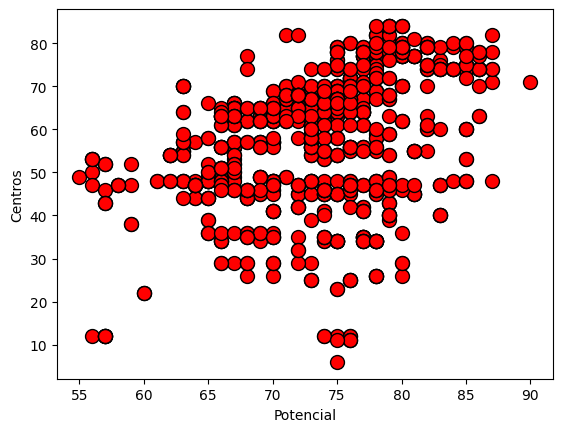

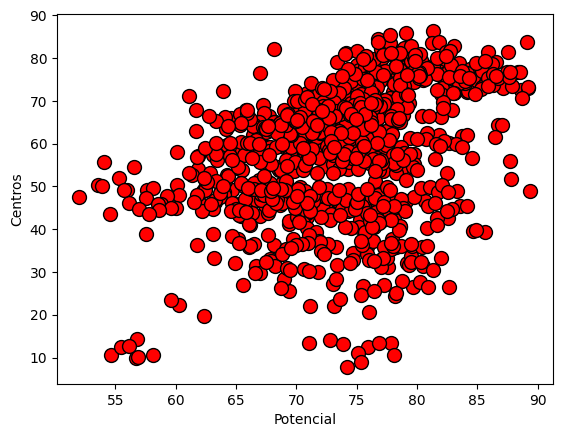

In [420]:
plotData(nuevo_data.iloc[:1000,1], nuevo_data.iloc[:1000,2])
plotData(data_duplicado.iloc[:1000,1], data_duplicado.iloc[:1000,2])

Juntar los dataset inicial y sintetico en un solo data set

In [421]:
def intercalar_filas(df1, df2):
    # Concatenar los DataFrames fila por fila alternadamente
    df_combined = pd.DataFrame()
    for i in range(df1.shape[0]):
        df_combined = pd.concat([df_combined, df1.iloc[[i]], df2.iloc[[i]]], ignore_index=True)
    return df_combined

In [422]:
data_final = intercalar_filas(nuevo_data, data_duplicado)
print(data_final)

       overall_rating  potential   crossing  finishing  heading_accuracy  \
0                 3.0  71.000000  49.000000  44.000000         71.000000   
1                 3.0  73.177123  47.351810  45.145961         68.148034   
2                 3.0  71.000000  49.000000  44.000000         71.000000   
3                 3.0  72.530168  46.115724  45.946241         70.380839   
4                 3.0  66.000000  49.000000  44.000000         71.000000   
...               ...        ...        ...        ...               ...   
39995             3.0  68.865942  62.487729  41.234345         58.464569   
39996             3.0  73.000000  62.000000  72.000000         58.000000   
39997             3.0  73.399026  62.493032  71.157680         57.526548   
39998             3.0  73.000000  62.000000  72.000000         58.000000   
39999             3.0  73.600865  63.920529  69.389694         55.989968   

       short_passing    volleys  dribbling      curve  free_kick_accuracy  \
0         

####Cargar datos en variables para usar

Voy a ignorar los datos de caracteres, texto y boleanos ya que fueron agregados de forma randomica y pueden afectar de manera negativa a las prediciciónes además que son datos que no se pueden procesar en una regresión se tendrían que cambiar a datos numericos, como perjudican más de lo que ayudan en la precisión de entrenamiento los dejaré fuera

In [423]:
X = data_final.iloc[:32000, 1:11]
y = data_final.iloc[:32000, 0]
m = y.size
X_prueb = data_final.iloc[32000:40000, 1:11]
y_prueb = data_final.iloc[32000:40000, 0]
m_prueb = y_prueb.size
num_labels = 5
print (X)
print (y)
print (X_prueb)
print (y_prueb)

       potential   crossing  finishing  heading_accuracy  short_passing  \
0      71.000000  49.000000  44.000000         71.000000      61.000000   
1      73.177123  47.351810  45.145961         68.148034      62.189395   
2      71.000000  49.000000  44.000000         71.000000      61.000000   
3      72.530168  46.115724  45.946241         70.380839      59.264359   
4      66.000000  49.000000  44.000000         71.000000      61.000000   
...          ...        ...        ...               ...            ...   
31995  90.772331  79.795695  83.836741         49.215533      82.581935   
31996  88.000000  80.000000  83.000000         50.000000      84.000000   
31997  89.274583  77.441934  83.330990         48.853256      84.250201   
31998  88.000000  80.000000  83.000000         54.000000      84.000000   
31999  85.697726  81.907657  85.977451         51.731329      83.687232   

         volleys  dribbling      curve  free_kick_accuracy  long_passing  
0      44.000000  51.000

##Modelo de regresión logistica

Función de normalización

In [424]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalización de datos de entrenamiento y prueba

In [425]:
X_norm, mu, sigma = featureNormalize(X)
X_prueb_norm, mu_prueb, sigma_prueb = featureNormalize(X_prueb)

Función de activación Sigmoide

In [426]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

Concatenamos x0 para los datos de entrenamiento y los datos de prueba

In [427]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X_prueb = np.concatenate([np.ones((m_prueb, 1)), X_prueb], axis=1)

Función de costo de la regresión lineal logistica

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

es la función binary cross entropy

In [428]:
def calcularCosto(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

Función que por medio de repeticiones logra sacar la mejor theta posible mediante el descenso por la gradiente

In [429]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        #Actualiza los parametros de theta con la formula del descenso por la gradiente
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

Función que saca las precciones con sigmoide de los datos que le pasemos

In [430]:
def prediccion(theta, X):
    m = X.shape[0]
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

###Ejecución de las funciones en cada caso y su prueba de eficacia

funcion que devuelve un array de datos convertidoa a 0 o 1

In [431]:
def covertirbin(clase,x):
  m = x.shape[0]
  yb = np.zeros(m)
  for i in range(m):
    if x.iloc[i] == clase:
      yb[i] = 1
    else:
      yb[i] = 0
  return yb

####Primera clase (0)

ultimo J:  0.008562818299908171
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [-4.75604144e+00  7.46393503e-16 -7.18651944e-16  2.09421369e-17
  3.23427049e-17  6.11651528e-16 -4.66015698e-16  3.44295703e-16
  1.06110815e-15 -1.19039216e-15 -2.55894221e-16]
--------------------------------------------------------------------------


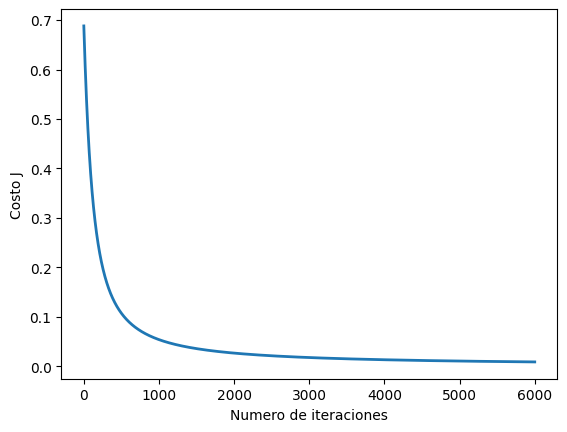

In [432]:
y_0 = covertirbin(0,y)
y_prueb_0 = covertirbin(0,y_prueb)

alpha = 0.02
num_iters = 6000
theta_0 = np.zeros(X.shape[1])
theta_0, J_history = descensoGradiente(theta_0, X, y_0, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('ultimo J: ',J_history[-1])
print('--------------------------------------------------------------------------')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_0)))
print('--------------------------------------------------------------------------')

In [433]:
p = prediccion(theta_0, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_0) * 100))

Precisión de entrenamiento: 100.00 %


In [434]:
p = prediccion(theta_0, X_prueb)
print('Precisión de los datos de prueba: {:.2f} %'.format(np.mean(p == y_prueb_0) * 100))

Precisión de los datos de prueba: 100.00 %


####Segunda clase (1)

ultimo J:  0.008151032520289803
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [-4.96619489e+00 -3.57968085e-02 -1.11047367e-02  3.42768207e-03
 -1.62390030e-02 -1.29226170e-02 -1.44417494e-02 -1.46057097e-02
  2.29833787e-02  2.29131216e-02 -1.38008876e-02]
--------------------------------------------------------------------------


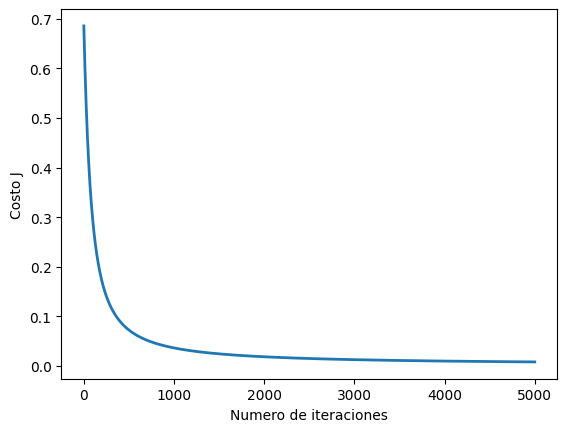

In [435]:
y_1 = covertirbin(1,y)
y_prueb_1 = covertirbin(1,y_prueb)

alpha = 0.03
num_iters = 5000
theta_1 = np.zeros(X.shape[1])
theta_1, J_history = descensoGradiente(theta_1, X, y_1, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('ultimo J: ',J_history[-1])
print('--------------------------------------------------------------------------')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_1)))
print('--------------------------------------------------------------------------')

In [436]:
p = prediccion(theta_1, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_1) * 100))

Precisión de entrenamiento: 99.98 %


In [437]:
p = prediccion(theta_1, X_prueb)
print('Precisión de los datos de prueba: {:.2f} %'.format(np.mean(p == y_prueb_1) * 100))

Precisión de los datos de prueba: 99.92 %


####Tercera clase (2)

ultimo J:  0.23641967632949332
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [-3.03819038 -1.44436141 -0.12794746  0.09317716 -0.38413714 -0.10945347
  0.03149096  0.30121143 -0.0583849  -0.40953142 -0.21276185]
--------------------------------------------------------------------------


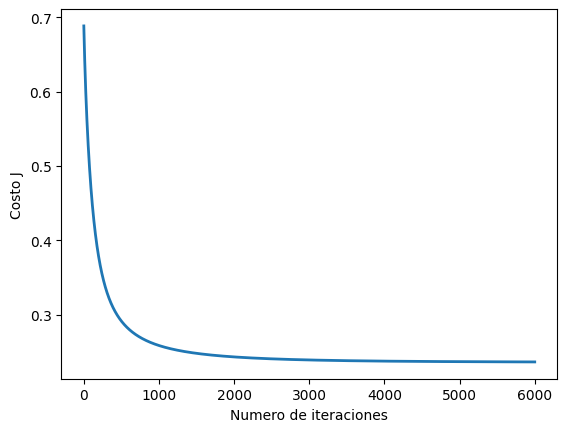

In [438]:
y_2 = covertirbin(2,y)
y_prueb_2 = covertirbin(2,y_prueb)

alpha = 0.02
num_iters = 6000
theta_2 = np.zeros(X.shape[1])
theta_2, J_history = descensoGradiente(theta_2, X, y_2, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('ultimo J: ',J_history[-1])
print('--------------------------------------------------------------------------')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_2)))
print('--------------------------------------------------------------------------')

In [439]:
p = prediccion(theta_2, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_2) * 100))

Precisión de entrenamiento: 90.55 %


In [440]:
p = prediccion(theta_2, X_prueb)
print('Precisión de los datos de prueba: {:.2f} %'.format(np.mean(p == y_prueb_2) * 100))

Precisión de los datos de prueba: 85.55 %


####Cuarta clase (3)

ultimo J:  0.40755354094919066
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [ 1.80539423  0.35637645  0.09049829 -0.06435945  0.32080948  0.12462138
 -0.26881242 -0.03125845  0.04957687  0.12575003  0.01548314]
--------------------------------------------------------------------------


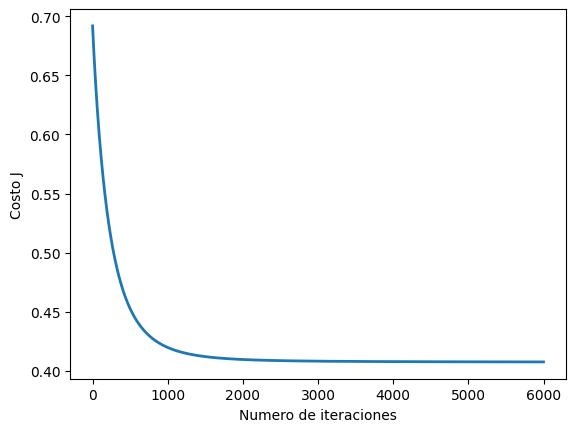

In [447]:
y_3 = covertirbin(3,y)
y_prueb_3 = covertirbin(3,y_prueb)

alpha = 0.01
num_iters = 6000
theta_3 = np.zeros(X.shape[1])
theta_3, J_history = descensoGradiente(theta_3, X, y_3, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('ultimo J: ',J_history[-1])
print('--------------------------------------------------------------------------')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_3)))
print('--------------------------------------------------------------------------')


In [442]:
p = prediccion(theta_3, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_3) * 100))

Precisión de entrenamiento: 84.72 %


In [443]:
p = prediccion(theta_3, X_prueb)
print('Precisión de los datos de prueba: {:.2f} %'.format(np.mean(p == y_prueb_3) * 100))

Precisión de los datos de prueba: 80.08 %


####Quinta clase (4)

ultimo J:  0.08977300269098014
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [-4.41434579e+00  1.50836095e+00 -9.86473095e-02 -3.27840818e-04
  2.53613005e-01  2.41866097e-01  3.66230838e-01 -9.88203473e-02
  1.11708753e-02  1.63863047e-01  3.57802543e-01]
--------------------------------------------------------------------------


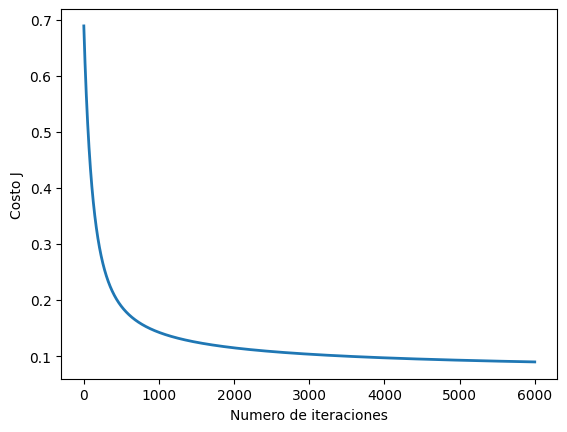

In [444]:
y_4 = covertirbin(4,y)
y_prueb_4 = covertirbin(4,y_prueb)

alpha = 0.02
num_iters = 6000
theta_4 = np.zeros(X.shape[1])
theta_4, J_history = descensoGradiente(theta_4, X, y_4, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('ultimo J: ',J_history[-1])
print('--------------------------------------------------------------------------')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_4)))
print('--------------------------------------------------------------------------')

In [448]:
p = prediccion(theta_4, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_4) * 100))

Precisión de entrenamiento: 96.63 %


In [451]:
p = prediccion(theta_4, X_prueb)
print('Precisión de los datos de prueba: {:.2f} %'.format(np.mean(p == y_prueb_4) * 100))

Precisión de los datos de prueba: 5.40 %
